<a href="https://colab.research.google.com/github/leadeeerq/Projects/blob/main/221231_USAF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import re
import pickle
import pandas as pd
from datetime import datetime

#Scraping the infobox

##Loading the webpage content

In [2]:
r = requests.get('https://en.wikipedia.org/wiki/Fairchild_Republic_A-10_Thunderbolt_II')
soup = bs(r.content)
contents = soup.prettify()

In [3]:
print(contents[:98])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
 


##Infobox

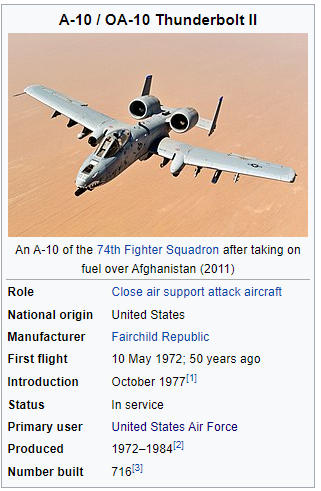

In [4]:
infobox = soup.find(class_ = 'infobox')
print(infobox.prettify()[:100])

<table class="infobox" style="width:25.5em;border-spacing:2px;">
 <tbody>
  <tr>
   <th colspan="2" 


In [5]:
infobox_rows = infobox.find_all('tr')
for row in infobox_rows:
  print(row.prettify()[5:50])

 <th colspan="2" style="text-align: center; f
 <td colspan="2" style="text-align: center;">
 <td colspan="2" style="border-bottom: 1px so
 <th>
  Role
 </th>
 <td>
  <a href="/wiki/Cl
 <th>
  <span class="nowrap">
   National ori
 <th>
  Manufacturer
 </th>
 <td>
  <a href="
 <th>
  First flight
 </th>
 <td>
  10 May 19
 <th>
  Introduction
 </th>
 <td>
  October 1
 <th>
  Status
 </th>
 <td>
  In service
 </t
 <th>
  Primary user
 </th>
 <td>
  <a href="
 <th>
  Produced
 </th>
 <td>
  1972–1984
  <
 <th>
  <span class="nowrap">
   Number built


##Saving rows to the dictionary

In [6]:
# #OBSOLETE

# def get_content(row_data):
#   if row_data.find('li'):
#     return [li.get_text(' ', strip = True).replace('\xa0', ' ') for li in row_data.find_all('li')]
#   else:
#     return row_data.get_text(' ', strip = True).replace('\xa0', ' ')

In [7]:
def get_content(row_data):
  return row_data.get_text(' ', strip = True)

In [8]:
aircraft_info = {}

for idx, row in enumerate(infobox_rows):
  if idx == 0:
    aircraft_info['name'] = row.find('th').get_text(' ', strip = True)
  elif idx == 1:
    #Image
    aircraft_info['img_link'] = row.find('a', href = True)['href']
  elif idx == 2:
    #Decription of the image
    continue
  else:
    content_key = row.find('th').get_text(' ', strip = True)
    content_val = get_content(row.find('td'))
    aircraft_info[content_key] = content_val

In [9]:
aircraft_info

{'name': 'A-10 / OA-10 Thunderbolt II',
 'img_link': '/wiki/File:Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg',
 'Role': 'Close air support attack aircraft Type of aircraft',
 'National origin': 'United States',
 'Manufacturer': 'Fairchild Republic',
 'First flight': '10\xa0May 1972 ; 50 years ago ( 1972-05-10 )',
 'Introduction': 'October 1977 [1]',
 'Status': 'In service',
 'Primary\xa0user': 'United States Air Force',
 'Produced': '1972–1984 [2]',
 'Number built': '716 [3]'}

##Scraping infobox function

In [10]:
def get_content(row_data):
  #If data is in the list
  if row_data.find('li'):
    return [li.get_text(' ', strip = True).replace('\xa0', ' ') for li in row_data.find_all('li')]
  else:
    return row_data.get_text(' ', strip = True).replace('\xa0', ' ')

def get_info(url):
  r = requests.get(url)
  soup = bs(r.content)

  infobox = soup.find(class_ = 'infobox')
  infobox_rows = infobox.find_all('tr')

  aircraft_info = {}

  for idx, row in enumerate(infobox_rows):
    if idx == 0:
      aircraft_info['name'] = row.find('th').get_text(' ', strip = True)
    elif idx == 1:
      #Image
      aircraft_info['img_link'] = row.find('a', href = True)['href']
    elif idx == 2:
      #Decription of the image
      continue
    else:
      content_key = row.find('th').get_text(' ', strip = True).replace('\xa0', ' ')
      content_val = get_content(row.find('td'))
      aircraft_info[content_key] = content_val

  return aircraft_info

In [11]:
get_info('https://en.wikipedia.org/wiki/Lockheed_AC-130')

{'name': 'AC-130 Spectre/Spooky/Stinger II/Ghostrider',
 'img_link': '/wiki/File:AC-130H_Spectre_banking_turn.jpg',
 'Role': 'Ground-attack aircraft and close air support gunship for SOF teams Type of aircraft',
 'National origin': 'United States',
 'Manufacturer': 'Lockheed Lockheed Martin',
 'First flight': 'AC-130A: 1966',
 'Introduction': ['AC-130A: 1968',
  'AC-130H: 1969 [1]',
  'AC-130U: 1995 [2]',
  'AC-130W: 2012 [3]',
  'AC-130J: 2017 [4]'],
 'Retired': ['AC-130A: 1995',
  'AC-130H: 2015 [1]',
  'AC-130U: 2020 [5]',
  'AC-130W: 2022 [6]'],
 'Status': 'In service',
 'Primary user': 'United States Air Force',
 'Developed from': 'Lockheed C-130 Hercules'}

#Scraping all infoboxes

##Loading the webpage with links

In [12]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_active_United_States_Air_Force_aircraft')
soup = bs(r.content)
contents = soup.prettify()

* A - Attack
* B - Bomber
* C - Transport
* E - Special Electronic
* F - Fighter
* H - Search and rescue
* K - Tanker
* M - Multi-mission
* O - Observation
* R - Reconnaissance
* T - Trainer
* TG - Trainer glider
* U - Utility
* V - VIP staff transport
* W - Weather reconnaissance
* Undesignated foreign aircraft

##Scraping the table

In [13]:
aircrafts_links = {}

table = soup.find('table')
table_rows = table.find_all('tr')

for table_row in table_rows:
  table_data = table_row.find('td')
  if table_data:
    link = table_data.find('a')
    aircrafts_links[link['title']] = link['href']

In [14]:
aircrafts_links

{'Fairchild Republic A-10 Thunderbolt II': '/wiki/Fairchild_Republic_A-10_Thunderbolt_II',
 'Lockheed AC-130': '/wiki/Lockheed_AC-130',
 'Air Tractor-L3Harris AT-802U Sky Warden': '/wiki/Air_Tractor-L3Harris_AT-802U_Sky_Warden',
 'Rockwell B-1 Lancer': '/wiki/Rockwell_B-1_Lancer',
 'Northrop Grumman B-2 Spirit': '/wiki/Northrop_Grumman_B-2_Spirit',
 'Northrop Grumman B-21 Raider': '/wiki/Northrop_Grumman_B-21_Raider',
 'Boeing B-52 Stratofortress': '/wiki/Boeing_B-52_Stratofortress',
 'McDonnell Douglas F-15 Eagle': '/wiki/McDonnell_Douglas_F-15_Eagle',
 'McDonnell Douglas F-15E Strike Eagle': '/wiki/McDonnell_Douglas_F-15E_Strike_Eagle#Variants',
 'General Dynamics F-16 Fighting Falcon': '/wiki/General_Dynamics_F-16_Fighting_Falcon',
 'Lockheed Martin F-22 Raptor': '/wiki/Lockheed_Martin_F-22_Raptor',
 'Lockheed Martin F-35 Lightning II': '/wiki/Lockheed_Martin_F-35_Lightning_II',
 'Boeing E-3 Sentry': '/wiki/Boeing_E-3_Sentry',
 'Boeing E-4': '/wiki/Boeing_E-4',
 'Bombardier Global E

##Get info with the url from the dictionary

In [15]:
for key, value in aircrafts_links.items():
  base = 'https://en.wikipedia.org/'
  rel_link = base + value
  try:
    print(get_info(rel_link))
  except:
    pass
  break

{'name': 'A-10 / OA-10 Thunderbolt II', 'img_link': '/wiki/File:Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg', 'Role': 'Close air support attack aircraft Type of aircraft', 'National origin': 'United States', 'Manufacturer': 'Fairchild Republic', 'First flight': '10 May 1972 ; 50 years ago ( 1972-05-10 )', 'Introduction': 'October 1977 [1]', 'Status': 'In service', 'Primary user': 'United States Air Force', 'Produced': '1972–1984 [2]', 'Number built': '716 [3]'}


In [16]:
aircrafts_info_list = []
for aircraft, link in aircrafts_links.items():
  base = 'https://en.wikipedia.org/'
  rel_link = base + link
  try:
    print(get_info(rel_link))
    aircrafts_info_list.append(get_info(rel_link))
  except:
    print('Error')

{'name': 'A-10 / OA-10 Thunderbolt II', 'img_link': '/wiki/File:Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg', 'Role': 'Close air support attack aircraft Type of aircraft', 'National origin': 'United States', 'Manufacturer': 'Fairchild Republic', 'First flight': '10 May 1972 ; 50 years ago ( 1972-05-10 )', 'Introduction': 'October 1977 [1]', 'Status': 'In service', 'Primary user': 'United States Air Force', 'Produced': '1972–1984 [2]', 'Number built': '716 [3]'}
{'name': 'AC-130 Spectre/Spooky/Stinger II/Ghostrider', 'img_link': '/wiki/File:AC-130H_Spectre_banking_turn.jpg', 'Role': 'Ground-attack aircraft and close air support gunship for SOF teams Type of aircraft', 'National origin': 'United States', 'Manufacturer': 'Lockheed Lockheed Martin', 'First flight': 'AC-130A: 1966', 'Introduction': ['AC-130A: 1968', 'AC-130H: 1969 [1]', 'AC-130U: 1995 [2]', 'AC-130W: 2012 [3]', 'AC-130J: 2017 [4]'], 'Retired': ['AC-130A: 1995', 'AC-130H: 2015 [1]', 'AC-130U: 2020 [5]', 'AC-130W

##Pickling the results

In [17]:
def to_pickle(file, filename):
  base_url = '/content/drive/MyDrive/Projekty/US Air Force/'
  with open (base_url+filename, 'wb') as handle:
    pickle.dump(file, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [18]:
to_pickle(aircrafts_info_list, 'aircrafts_info_list.pickle')

In [19]:
with open('/content/drive/MyDrive/Projekty/US Air Force/aircrafts_info_list.pickle', 'rb') as handle:
  aircrafts_info_list = pickle.load(handle)

In [20]:
aircrafts_info_list[5]

{'name': 'B-21 Raider',
 'img_link': '/wiki/File:B-21_Plant_42_hangar.jpg',
 'Role': 'Stealth strategic bomber Type of aircraft',
 'National origin': 'United States',
 'Manufacturer': 'Northrop Grumman',
 'Status': 'In development',
 'Primary user': 'United States Air Force'}

In [21]:
len(aircrafts_info_list)

64

##Rough check of the results with get method

In [22]:
roles = [aircraft.get('Role', 'NaN') for aircraft in aircrafts_info_list]
print(roles)

['Close air support attack aircraft Type of aircraft', 'Ground-attack aircraft and close air support gunship for SOF teams Type of aircraft', 'Light attack /ISR aircraft Type of aircraft', 'Supersonic strategic heavy bomber Type of aircraft', 'Stealth strategic heavy bomber Type of aircraft', 'Stealth strategic bomber Type of aircraft', 'Strategic bomber Type of aircraft', 'Air superiority fighter Type of aircraft', 'Multirole strike fighter Type of aircraft', 'Multirole fighter , air superiority fighter Type of aircraft', 'Air superiority fighter Type of aircraft', 'Multirole fighter Type of aircraft', 'Airborne early warning and control (AEW&C) Type of aircraft', 'Airborne strategic command and control post Type of aircraft', 'NaN', 'Business jet Type of aircraft', 'Airborne Communications Jamming (EC-130H) Psychological and Information Operations (EC-130J) Type of aircraft', 'Electronic warfare (EW), Suppression of Enemy Air Defenses (SEAD), offensive counter-information Type of air

In [23]:
count_roles_nan = roles.count('NaN')
count_roles_nan

4

In [24]:
images = [aircraft.get('img_link', 'NaN') for aircraft in aircrafts_info_list]
count_img_nan = images.count('NaN')
count_img_nan

0

###Regular expression to change the quantities

In [25]:
numbers_built = [aircraft.get('Number built', 'NaN') for aircraft in aircrafts_info_list]
print(numbers_built)

['716 [3]', 'NaN', 'NaN', '104 [a]', '21 [1] [2]', 'NaN', '744 [1]', 'F-15A/B/C/D/J/DJ: 1,198 [1]', '525 [N 1]', '4,604 (June 2018) [2] [3]', '195 (8 test and 187 operational aircraft) [1]', '875+ as of December 2022 [update] [4]', '68', '4', '816 (Oct 2018) [2]', '>600 [1]', '14 EC-130H 7 EC-130J', '14 (USAF)', '17 [1]', '1,258 (as of March 31, 2019) [2]', 'NaN', 'NaN', '32 total airframes in all iterations', '104', '1,700 (as of October 2019 [update] ) [1]', '354 ( CASA 285 [2] + IPTN 69 [3] )', 'KC-10: 60; KDC-10: 2', '56 as of November 2021 [3]', 'KC-130B: 6 KC-130F: 46 KC-130H: 33 KC-130R: 14 KC-130T: 28 KC-130J: 53', '803', '131 (C-5A: 81, C-5B: 50)', '695', '279 [1]', '900+ [1]', '738', 'C-32A: 4; [1] C-32B: 2 [2]', '28 [ citation needed ]', 'Over 2,500 as of 2015 [2]', '500 as of March 2022 [1]', '200+ (including PZL An-28)', '217', 'HC-130P/N: Active force, 13; ANG, 13; Reserve, 10 HC-130H: 22; two with the Avionics One Upgrade (A1U) HC-130J: 6', '2,600 (Nov 2017) [1]', 'Dec 2

In [26]:
pattern = r'\[\d+\]|\(\D*\d*\,*\d{4}\D*\)'
# pattern2 = r'\[\D\]|(\D+\d*\D*)|(\d{4})'
p3 = r'(\[\D*\])|(\((\d|\D)*)\)'
p4 = r'(\D*-\d*\D)|(\[\D*\d\])'
p5 = r'\d{4}(?!\+)'
p6 = r'\D'
for item in range(len(numbers_built)):
  numbers_built[item] = re.sub(pattern, '', numbers_built[item])
  numbers_built[item] = re.sub(p3, '', numbers_built[item])
  numbers_built[item] = re.sub(p4, '', numbers_built[item])
  numbers_built[item] = re.sub(p5, '', numbers_built[item])
  numbers_built[item] = re.sub(p6, '', numbers_built[item])
  print(numbers_built[item])
# print(numbers_built)

716


104
21

744
1198
525
4604
195
875
68
4
816
600
147
14
17
1258


32
104
1700
354
602
56
64633142853
803
131
695
279
900
738
42
28
2500
500
200
217
131310226
2600
985
2
112
1100

400
60
64
180
850
2
1189
1459
16000

12000
316
42
19000
1000
2030


#Loading the webpage with aircraft types description

In [27]:
r = requests.get('https://en.wikipedia.org/wiki/United_States_Air_Force')
soup = bs(r.content)
contents = soup.prettify()

##Finding the chapter with aircraft types description

In [28]:
h2_tags = soup.find_all('h2')
for h2_tag in h2_tags:
  if h2_tag.find('span', id = 'Aircraft_inventory'):
    aircraft_inventory = h2_tag.find('span', id = 'Aircraft_inventory')
    aircraft_inventory_tag = aircraft_inventory.parent
    print(aircraft_inventory.text)

Aircraft inventory


In [29]:
aircraft_inventory

<span class="mw-headline" id="Aircraft_inventory">Aircraft inventory</span>

##Finding siblings (h3 and p tags)

In [30]:
aircrafts_description = {}

next_h3_siblings = aircraft_inventory_tag.find_next_siblings('h3', limit = 16)

for h3_sibling in next_h3_siblings:
  aircraft_type = h3_sibling.text.replace('[edit]', '')
  h3_sibling_tag = h3_sibling.parent
  next_p_siblings = h3_sibling.find_all_next(('p','h3'), limit = 5)
  
  description = []

  for item in next_p_siblings:
    if item.name == 'p':
      description.append(item.text)
    else:
      break
    aircrafts_description[aircraft_type] = ' '.join(description)

##Results in a dictionary

In [31]:
aircrafts_description

{'A – Attack': "The attack aircraft[85] of the USAF are designed to attack targets on the ground and are often deployed as close air support for, and in proximity to, U.S. ground forces. The proximity to friendly forces require precision strikes from these aircraft that are not always possible with bomber aircraft. Their role is tactical rather than strategic, operating at the front of the battle rather than against targets deeper in the enemy's rear. The Air Force is currently running the OA-X experiment, with the intent to procure an off-the-shelf light attack aircraft. Current USAF attack aircraft are operated by Air Combat Command, Pacific Air Forces, and Air Force Special Operations Command.\n",
 'B – Bomber': "US Air Force bombers are strategic weapons, primarily used for long range strike missions with either conventional or nuclear ordnance. Traditionally used for attacking strategic targets, today many bombers are also used in the tactical mission, such as providing close air 

In [32]:
for key, val in aircrafts_description.items():
    print(key)
    print(val[:100])
    break

A – Attack
The attack aircraft[85] of the USAF are designed to attack targets on the ground and are often deplo


#DataFrame

In [33]:
df = pd.DataFrame(aircrafts_info_list)
df.head()

,name,img_link,Role,National origin,Manufacturer,First flight,Introduction,Status,Primary user,Produced,Number built,Retired,Developed from,Primary users,Variants,Developed into,Designer,Design group,Built by
0,A-10 / OA-10 Thunderbolt II,/wiki/File:Fairchild_Republic_A-10_Thunderbolt...,Close air support attack aircraft Type of airc...,United States,Fairchild Republic,10 May 1972 ; 50 years ago ( 1972-05-10 ),October 1977 [1],In service,United States Air Force,1972–1984 [2],716 [3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AC-130 Spectre/Spooky/Stinger II/Ghostrider,/wiki/File:AC-130H_Spectre_banking_turn.jpg,Ground-attack aircraft and close air support g...,United States,Lockheed Lockheed Martin,AC-130A: 1966,"[AC-130A: 1968, AC-130H: 1969 [1], AC-130U: 19...",In service,United States Air Force,NaN,NaN,"[AC-130A: 1995, AC-130H: 2015 [1], AC-130U: 20...",Lockheed C-130 Hercules,NaN,NaN,NaN,NaN,NaN,NaN
2,AT-802U Sky Warden,/wiki/File:AirTractor_Paris_I.jpg,Light attack /ISR aircraft Type of aircraft,United States,Air Tractor / L3Harris Technologies,NaN,NaN,NaN,United States Special Operations Command,NaN,NaN,NaN,Air Tractor AT-802,NaN,NaN,NaN,NaN,NaN,NaN
3,B-1 Lancer,/wiki/File:B-1B_air_refueling.jpg,Supersonic strategic heavy bomber Type of airc...,United States,North American Rockwell/Rockwell International,23 December 1974 ; 48 years ago ( 1974-12-23 ),1 October 1986,In service,United States Air Force,"1973–1974, 1983–1988",104 [a],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B-2 Spirit,/wiki/File:B-2_Spirit_(cropped).jpg,Stealth strategic heavy bomber Type of aircraft,United States,Northrop Corporation Northrop Grumman,17 July 1989 ; 33 years ago ( 1989-07-17 ),1 January 1997,In service,United States Air Force,1987–2000,21 [1] [2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##First flight to datetime conversion

In [94]:
first_flights = [aircraft.get('First flight', 'NaN') for aircraft in aircrafts_info_list]
first_flights[:5]

['10 May 1972 ; 50 years ago ( 1972-05-10 )',
 'AC-130A: 1966',
 'NaN',
 '23 December 1974 ; 48 years ago ( 1974-12-23 )',
 '17 July 1989 ; 33 years ago ( 1989-07-17 )']

In [44]:
re.match(r'\d{4}', '1975')

<re.Match object; span=(0, 4), match='1975'>

In [ ]:
pattern_YYYY = r'\d{4}' #To check if the date is just the year
pattern_model_date = r'\D{1,2}-\d{2,3}\D:\s' #To check if the date starts with the model name AC-130A: 1968, AC-130H: 1969 [1],
pattern_model_year = r'\D{1,2}-\d{2,3}\D\s\(' #KC-130F (2006)


def date_conversion(date): 
  if isinstance(date, list):
    date = str(date[0]) #Take first element from the list
    if len(date) > 18:
      date = date.split(' ;')[0]
    else:
      str(date)

  if isinstance(date, str):
    if '(' in date:
      date = date.split(' (')[0]
    
    if '[' in date:
      date = date.split(' [')[0]

    if re.match(pattern_model_year, date):
      date = re.sub(pattern_model_year, '', date).split(')')[0]

    if re.match(pattern_model_date, date):
      date = re.sub(pattern_model_date, '', date)
      if re.match(pattern_YYYY, date):
        date = date[0:4]
      else:
        date = " ".join(date.split(" ", 3)[:3])
    elif len(date) > 18 and not re.match(pattern_YYYY, date):
      date = date.split(' ;')[0]
    elif len(date) > 18 and re.match(pattern_YYYY, date):
      date = date[0:4]
    elif re.match(pattern_YYYY, date):
      date = date[0:4]
    
    else:
      date

  if date == 'NaN':
    return None

  date = str(date)

  # %Y - year [0001,..., 2018, 2019,..., 9999]
  # %m - month [01, 02, ..., 11, 12]
  # %d - day [01, 02, ..., 30, 31]
  # %H - hour [00, 01, ..., 22, 23
  # %M - minute [00, 01, ..., 58, 59]
  # %S - second [00, 01, ..., 58, 59]

  #Possibilities are: dd M yyyy; yyyy; M dd, yyyy; M yyyy

  formats = ['%Y', '%B %d, %Y', '%d %B %Y', '%B %Y']
  for format in formats:
    try:
      return datetime.strptime(date, format).date()
    except:
      pass

  # return None
  # print(date)

for date in first_flights:
  # date_conversion(date)
  print(date, 'converted to: ', date_conversion(date))

##Introduction date to datetime conversion

In [ ]:
introduction_dates = [aircraft.get('Introduction', 'NaN') for aircraft in aircrafts_info_list]
introduction_dates

In [ ]:
for date in introduction_dates:
  print(date, 'converted to: ', date_conversion(date))

##Retired date to datetime conversion

In [ ]:
retired_dates = [aircraft.get('Retired', 'NaN') for aircraft in aircrafts_info_list]
retired_dates

In [139]:
for date in retired_dates:
  print(date, 'converted to: ', date_conversion(date))

NaN converted to:  None
['AC-130A: 1995', 'AC-130H: 2015 [1]', 'AC-130U: 2020 [5]', 'AC-130W: 2022 [6]'] converted to:  1995-01-01
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
KC-130F (2006) KC-130R (2007) KC-130T (2021) converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converted to:  None
NaN converte

In [122]:
pattern_model_year = r'\D{1,2}-\d{2,3}\D\s\('
test = 'KC-130F (2006) KC-130R (2007) KC-130T (2021)'
asd = re.sub(pattern_model_year, '', test).split(')')[0]
asd

'2006'

In [ ]:
pattern_YYYY = r'\d{4}' #To check if the date is just the year
pattern_model_date = r'\D{1,2}-\d{2,3}\D:\s' #To check if the date starts with the model name
pattern_model_year = r'\D{1,2}-\d{2,3}\D\s\(' #KC-130F (2006)


def date_conversion(date): 
  if isinstance(date, list):
    date = str(date[0]) #Take first element from the list
    if len(date) > 18:
      date = date.split(' ;')[0]
    else:
      str(date)

  if isinstance(date, str):
    if '(' in date:
      date = date.split(' (')[0]
    
    if '[' in date:
      date = date.split(' [')[0]

    if re.match(pattern_model_year, date):
      date = re.sub(pattern_model_year, '', date).split(')')[0]

    if re.match(pattern_model_date, date):
      date = re.sub(pattern_model_date, '', date)
      if re.match(pattern_YYYY, date):
        date = date[0:4]
      else:
        date = " ".join(date.split(" ", 3)[:3])
    elif len(date) > 18 and not re.match(pattern_YYYY, date):
      date = date.split(' ;')[0]
    elif len(date) > 18 and re.match(pattern_YYYY, date):
      date = date[0:4]
    elif re.match(pattern_YYYY, date):
      date = date[0:4]
    
    else:
      date

  if date == 'NaN':
    return None

  date = str(date)

  # %Y - year [0001,..., 2018, 2019,..., 9999]
  # %m - month [01, 02, ..., 11, 12]
  # %d - day [01, 02, ..., 30, 31]
  # %H - hour [00, 01, ..., 22, 23
  # %M - minute [00, 01, ..., 58, 59]
  # %S - second [00, 01, ..., 58, 59]

  #Possibilities are: dd M yyyy; yyyy; M dd, yyyy; M yyyy

  formats = ['%Y', '%B %d, %Y', '%d %B %Y', '%B %Y']
  for format in formats:
    try:
      return datetime.strptime(date, format).date()
    except:
      pass

  # return None
  # print(date)

for date in first_flights:
  # date_conversion(date)
  print(date, 'converted to: ', date_conversion(date))

##Removal of "Type of aircraft" in Role

In [148]:
def clean_role(role):
  to_remove = ' Type of aircraft'
  return role.replace(to_remove,'')

In [150]:
print(clean_role('Strategic bomber Type of aircraft'))

Strategic bomber


##Applying date_conversion function to the DF

In [129]:
df.columns

Index(['name', 'img_link', 'Role', 'National origin', 'Manufacturer',
       'First flight', 'Introduction', 'Status', 'Primary user', 'Produced',
       'Number built', 'Retired', 'Developed from', 'Primary users',
       'Variants', 'Developed into', 'Designer', 'Design group', 'Built by'],
      dtype='object')

In [151]:
for aircraft in aircrafts_info_list:
  aircraft['First flight (formatted)'] = date_conversion(aircraft.get('First flight', 'NaN'))
  aircraft['Introduction (formatted)'] = date_conversion(aircraft.get('Introduction', 'NaN'))
  aircraft['Retired (formatted)'] = date_conversion(aircraft.get('Retired', 'NaN'))
  aircraft['Role'] = clean_role(aircraft.get('Role', 'NaN'))

In [152]:
df = pd.DataFrame(aircrafts_info_list)
df.head(3)

,name,img_link,Role,National origin,Manufacturer,First flight,Introduction,Status,Primary user,Produced,...,Introduction (formatted),Retired (formatted),Retired,Developed from,Primary users,Variants,Developed into,Designer,Design group,Built by
0,A-10 / OA-10 Thunderbolt II,/wiki/File:Fairchild_Republic_A-10_Thunderbolt...,Close air support attack aircraft,United States,Fairchild Republic,10 May 1972 ; 50 years ago ( 1972-05-10 ),October 1977 [1],In service,United States Air Force,1972–1984 [2],...,1977-10-01,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AC-130 Spectre/Spooky/Stinger II/Ghostrider,/wiki/File:AC-130H_Spectre_banking_turn.jpg,Ground-attack aircraft and close air support g...,United States,Lockheed Lockheed Martin,AC-130A: 1966,"[AC-130A: 1968, AC-130H: 1969 [1], AC-130U: 19...",In service,United States Air Force,NaN,...,1968-01-01,1995-01-01,"[AC-130A: 1995, AC-130H: 2015 [1], AC-130U: 20...",Lockheed C-130 Hercules,NaN,NaN,NaN,NaN,NaN,NaN
2,AT-802U Sky Warden,/wiki/File:AirTractor_Paris_I.jpg,Light attack /ISR aircraft,United States,Air Tractor / L3Harris Technologies,NaN,NaN,NaN,United States Special Operations Command,NaN,...,None,None,NaN,Air Tractor AT-802,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df.columns

Index(['name', 'img_link', 'Role', 'National origin', 'Manufacturer',
       'First flight', 'Introduction', 'Status', 'Primary user', 'Produced',
       'Number built', 'First flight (formatted)', 'Introduction (formatted)',
       'Retired (formatted)', 'Retired', 'Developed from', 'Primary users',
       'Variants', 'Developed into', 'Designer', 'Design group', 'Built by'],
      dtype='object')

#Data analysis

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      64 non-null     object
 1   img_link                  64 non-null     object
 2   Role                      64 non-null     object
 3   National origin           45 non-null     object
 4   Manufacturer              63 non-null     object
 5   First flight              51 non-null     object
 6   Introduction              55 non-null     object
 7   Status                    58 non-null     object
 8   Primary user              18 non-null     object
 9   Produced                  47 non-null     object
 10  Number built              57 non-null     object
 11  First flight (formatted)  51 non-null     object
 12  Introduction (formatted)  55 non-null     object
 13  Retired (formatted)       2 non-null      object
 14  Retired                   3 

In [155]:
df.describe()

,name,img_link,Role,National origin,Manufacturer,First flight,Introduction,Status,Primary user,Produced,...,Introduction (formatted),Retired (formatted),Retired,Developed from,Primary users,Variants,Developed into,Designer,Design group,Built by
count,64,64,64,45,63,51,55,58,18,47,...,55,2,3,42,42,12,12,1,2,1
unique,64,64,52,9,48,51,54,12,2,47,...,52,2,3,36,41,12,12,1,2,1
top,A-10 / OA-10 Thunderbolt II,/wiki/File:Fairchild_Republic_A-10_Thunderbolt...,NaN,United States,Boeing,10 May 1972 ; 50 years ago ( 1972-05-10 ),1959,In service,United States Air Force,1972–1984 [2],...,1959-01-01,1995-01-01,"[AC-130A: 1995, AC-130H: 2015 [1], AC-130U: 20...",Lockheed C-130 Hercules,United States Air Force Japan Air Self-Defense...,"[McDonnell Douglas F-15E Strike Eagle, McDonne...","[Vought Model 1600, General Dynamics F-16XL, M...","Clarence ""Kelly"" Johnson",Antonov / PZL Mielec,Kazan Helicopter Plant Ulan-Ude Aviation Plant
freq,1,1,4,35,7,1,2,31,17,1,...,2,1,1,3,2,1,1,1,1,1


In [156]:
df['Role'].unique()

array(['Close air support attack aircraft',
       'Ground-attack aircraft and close air support gunship for SOF teams',
       'Light attack /ISR aircraft', 'Supersonic strategic heavy bomber',
       'Stealth strategic heavy bomber', 'Stealth strategic bomber',
       'Strategic bomber', 'Air superiority fighter',
       'Multirole strike fighter',
       'Multirole fighter , air superiority fighter', 'Multirole fighter',
       'Airborne early warning and control (AEW&C)',
       'Airborne strategic command and control post', 'NaN',
       'Business jet',
       'Airborne Communications Jamming (EC-130H) Psychological and Information Operations (EC-130J)',
       'Electronic warfare (EW), Suppression of Enemy Air Defenses (SEAD), offensive counter-information',
       'Airborne battle management', 'Turboprop regional airliner',
       'Military utility aircraft', 'Military transport aircraft',
       'Reconnaissance aircraft', 'High-altitude reconnaissance aircraft',
       'Passeng